# Plagiarism Detection:
Plagiarism is the problem of copying or stealing someone else's ideas and content and using it or publishing it as your own. This comes to include everything from graphical content to textual content but the focus of the topic here would be text only. To find plagiarism, a set of techniques are used in natural language processing to identify whether a certain piece of text (either at sentence level, passage level or document level) has been copy pasted without the authority or mention of the actual source it is copied from and mark the percentage of such content for a given document. Before we first start off with the details of how plagiarism detection works, lets get a better understanding of what actually is plagiarism. The following spectrum reflects on the 12 of the most common cases that can be referred to as the act of plagiarism. (This spectrum has been taken from [Turnitin's Plagiarism Spectrum](https://www.turnitin.com/resources/plagiarism-spectrum-2-0))

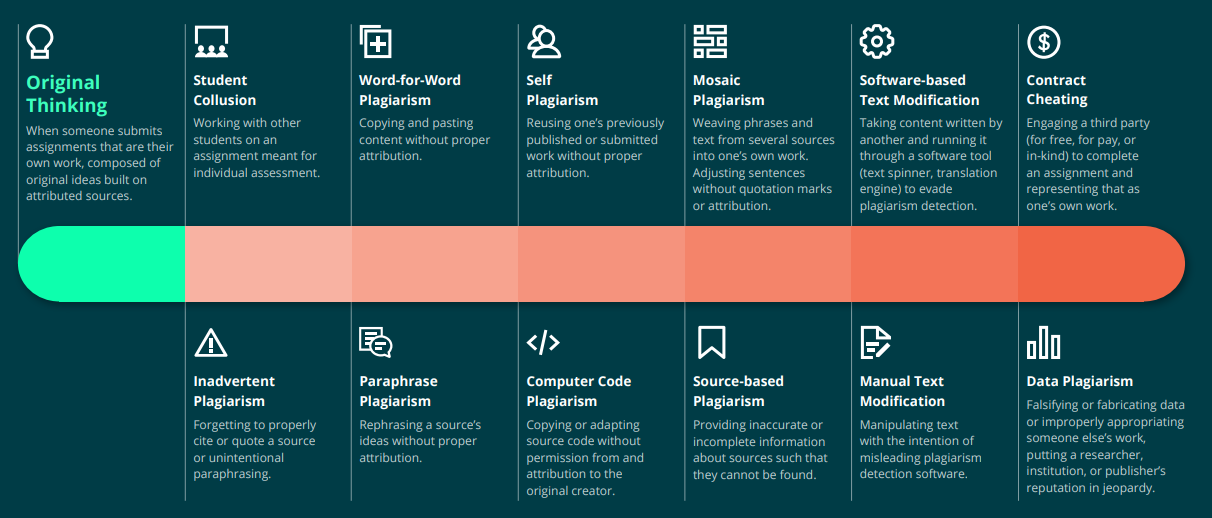

## General Architecture for Plagiarism Detection Model:
Plagiarism Detection works on the basis of a set of steps which includes preprocessing, feature extraction, fetching similar documents on the basis of extracted features, performing similarity with the fetched documents and computing the overall plagiarism score. Below I have attached what a general plagiarism detection architecture may look like. I'll go on to briefly explain each step in a more detailed manner under.

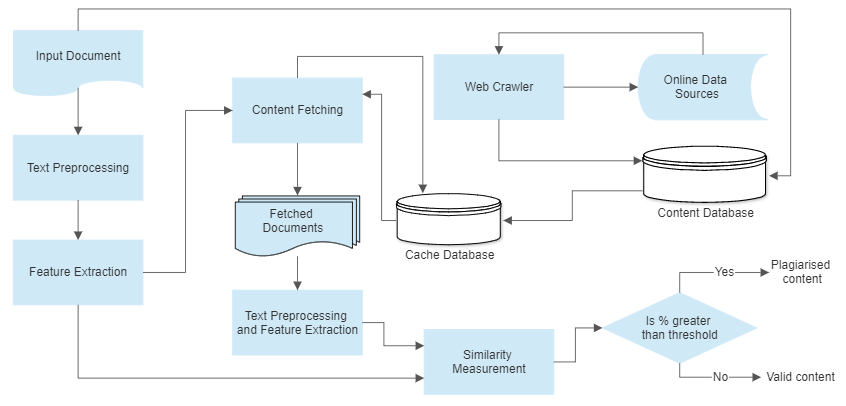

Now lets go over each of these steps one by one in a little detail on how they can take place. 

### Document Input:
The first step in the detection is to obviously input the document that has to be declared as either plagiarised or valid. The input document can be any piece of text that contains readable and valid content for the linguistic on the basis of which the detector has been setup. For instance, if the detector works on the basis of english vocabulary online, its only natural for it to not find any plagiarised content in a Spanish document. Obviously, the document formats depend on different plagiarism systems and they give you information on which ones are acceptable by them but in this case I am talking about general perspective so we will take the ideal scenario of accepting any and all readable document formats.

### Text Preprocessing:
The next step is to perform text preprocessing on the contents of the document. To perform the preprocessing step, it is quite obvious that we first have to read the contents stored in it. This can differ for different formats and the approach should be selected accordingly. Once the contents have been read, there are different preprocessing techniques that can be used e.g. tokenization (on words or sentences or passages), stopword removal, stemming, lemmitization, POS tagging, etc. The final output of the text preprocessing step would be a set of text words/sentences/passages that provide the maximum detail about the content of the document with occupation of minimized storage.

### Feature Extraction:
Once text has been preprocessed, the next step would be to extract the most important features from the text that can serve as an identification parameter for the content stored in the document. Examples of such features may include keywords, themes, tones and setting of the content. Such things can be obtained using different NLP techniques e.g. word embeddings and Tf-Idf vectors. The goal of this task is to identify the key points highlighted by the content which can then be used to filter out relevant documents from the content database.

### Content Fetching:
Now based on the collected features from the provided content, the content fetching process takes place which might differ for different systems. The purpose of the system is to fetch documents related to the given topic from whatever storage it utilizes. In my case, I have used a cache database, as it should be used, to retreive the content that matches on the extracted set of keywords. If the cache is unable to find such documents, then it can ask the database to give the results. Moreover, the database itself is constantly updated based on some batch update time by making use of a web crawler on different topics that are asked for. So the web crawler is likely to take the features of the inputted document and use it to search online, recent and most commonly used resources for the passage. Using all this accumulated data (from cache, database and online resources), the content fetching mechanims brings out a set of documents that can be used for similarity measurement. In some particular cases, the need for online resources isn't required as they have their own collective database of previous records to utilize for content fetching (e.g. in case of educational institutes, etc.)

### Similarity Measurement:
The fetched documents are all preprocessed and feature engineered (if necessary) just like the inputted document and then passed through some defined similarity measure. The similarity measure is best in case it clearly identifies the lexical, syntactical and semantic similarities on a sentence level scale and order. This allows to thouroughly investigate whether any of the points mentioned in the spectrum are violated or not. Similarity measurement techniques can vary from simple metrics like jaccard score and cosine similarity to advance methods like latent dirichlet allocation (LDA) and siamese networks, etc. The final result of this step is usually measured as a percentage.

### Threshold Comparison:
For all plagiarism checkers, there is a defined set of threshold that a document must not surpass to avoid being declared as plagiarised content. In some cases, different sections of the document are evaluated different, in other cases the whole document is considered as a single entity. The set threshold depends on the type of task for which plagiarism is being checked. Hence, for the set threshold, if the obtained percentage is greater, than the document is categorized as a plagiarised document, otherwise it is considered valid. The entered input document is added to the list of already present content in the content database (based on the set of features or fingerprints).

## Plagiarism Identification for Defined Spectrum:
Now lets take a look at how all of the cases defined in the spectrum can be avoided on the basis of this generalized architecture:

### Student Collusion:
Its possible that two or more students together help each other out in completing the assignment out of there own words. Although this plagiarism seems minor in nature, it still counts as one. This can be determined to some extent by intra-similarity checking among the submitted documents by the students. That is we will make use of the database of student assignments for the plagiarism detection and will compare each assignment with each other to get a gist of how similar they are in nature, after the necessary preprocessing and feature extraction. Those which are greater than the set threshold of plagiarism will be considered cheated.

### Inadvertent Plagiarism:
It can be the case that simple quotational statements or paraphrasing has been performed from some original work without proper attribution. To detect this plagiarism, the detector can utilize the keywords of the content and use it to fetch similar documents. It will be highly likely to retreive the document that contained the original content and when the final scanning is done, we will be able to find the copied pieces from the content. 

### Word-for-Word Plagiarism:
Its also possible for someone to exactly copy paste content from another work without giving it proper attribution. In this case as well, the detector will fetch documents that have similar properties and pieces of text as the content and would be able to easily detect which passages have been copied from that source.

### Paraphrase Plagiarism:
Paraphrasing refers to the act to rephrasing some text. In case of plagiarism, it can be used to rephrase someone else's ideas and then publish them as yours. Since detectors work on a semantic scale, paraphrasing can't help much to cover some idea as it would allow to still fetch documents of the similar kind and then make use of them to find which areas are plagiarised.

### Self-Plagiarism:
Self-Plagiarism refers to publishing someone else's work as your own. Detectors would be able to find which content was utilized for the task of plagiarism and may make use of its resources to find whether its an already published content or not. For a specific use case like educational institutes, they can use their own database of content to find this out.

### Computer Code Plagiarism:
This includes copying the source code from some author without proper attribution or permission. To find this kind of plagiarism, the detector can be trained specifically on computer code detection and semantics i.e. whether the two pieces of code are the same or not. This can then be utilized in the same manner to find if the code has been copied from some other content.

### Mosaic Plagiarism:
This can lead to the author using mulitple and diverse resources to generate passage for its content. Since detectors utilize multiple documents for similarity matching and its done on a synctactic as well as semantic scale, we will still be able to determine if the content is plagiarised or not.

### Source-based Plagiarism:
In this plagiarism, the author defines inaccurate and inapproriate sources to his content. A good detector is designed in a manner that it makes use of the references embedded in the content to find the resources utilized by it. If they are valid resources, it makes use of the content of those resources to check the content. Otherwise, if its not, then the source is undefined and hence it is considered as source-based plagiarism.

### Software-based Text Modification:
In the world of today, many people utilize AI based tools and softwares to rephrase or generate a newly generated text from a given idea. Although this may seem very difficult to sort as plagiarized content, tools like these usually rephrase or regenerate text based on the idea that it extracts from the provided input. Thus, a proper semantic based detector will still be able to find if the idea represented by the text has been copied from some other source or not.

### Manual Text Modification:
Manual Text Modification implies changing the idea carried by some other author and use your own wordings to regenerate the content as a whole. Just like software-based modification, manual modification can be detected by interpreting the semantics of the content and measuring the similarity between the two documents.

### Contract Cheating:
Contract Cheating refers to paying some third party to perform some task assigned to you. This sort of plagiarism can be detected by making use of past experiences or history of the author's previous works. For example in case of institutions, the teaching staff can easily determine if the content was written by the student or not based on his performance in the class or overall. These reviews allow to ensure that the content has not be plagiarised.

### Data Plagiarism:
This plagiarism includes the wrong attribution of authors, research papers and institutions in your work and giving your own content or rather some unpolished version of it and publishing it with some name of author or institute who didn't say or write such content. For this task, the detector has to sort out the different works of the authors or institutes mentioned and then sort them out to find if plagiarism is present or not. If the content or any idea related to it is not found there, we can say that data plagiarism was involved.

That's pretty much it for now. Next time we will take a look into recommender systems. Happy Learning!!